# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# importing dataset

In [2]:
x = pd.read_csv('heart.csv')

In [3]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# Exploratory Data Analysis

<Axes: >

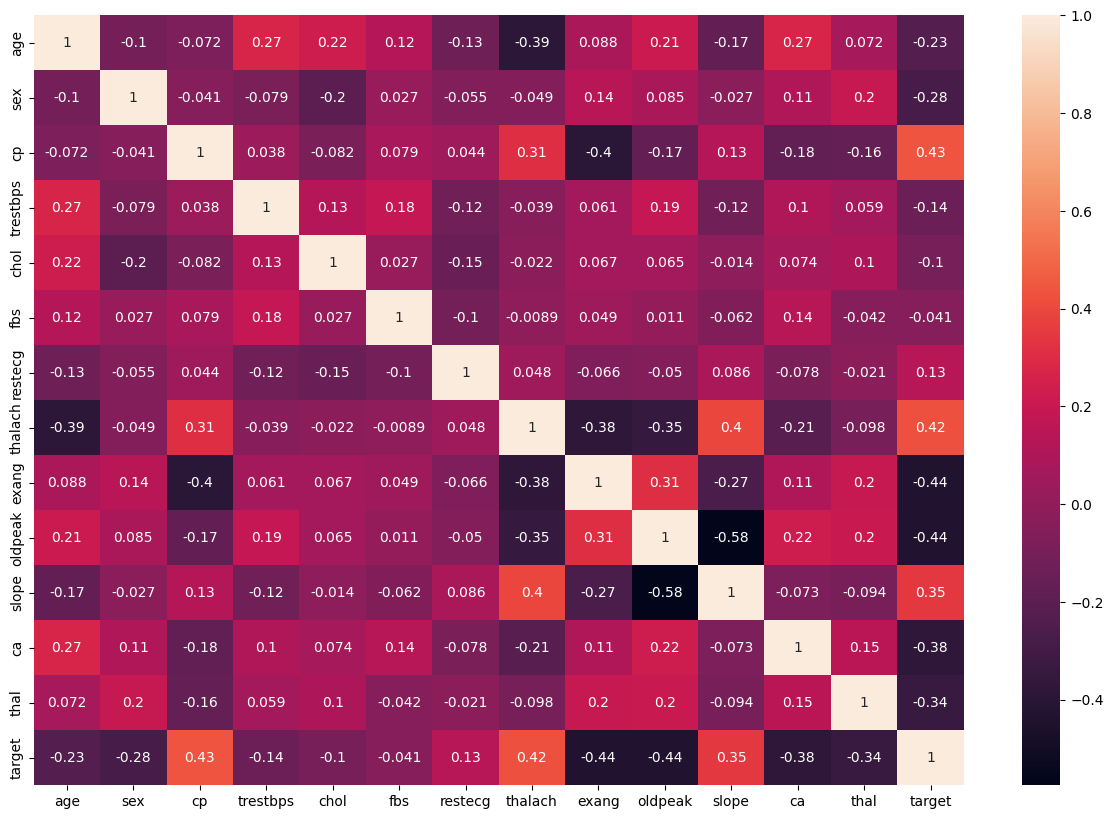

In [5]:
plt.subplots(figsize=(15, 10))
sns.heatmap(x.corr(), annot = True)

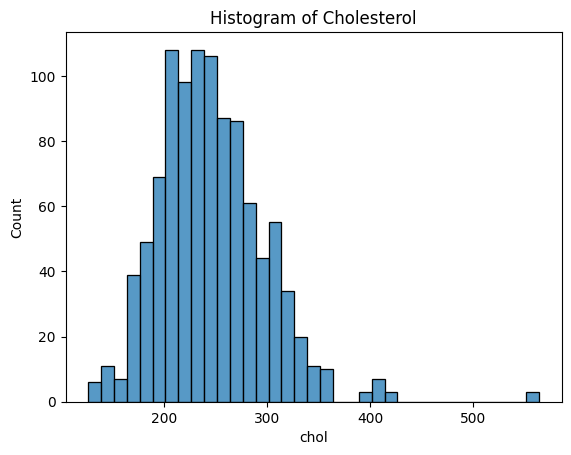

In [6]:
# Histogram of chol

sns.histplot(data=x, x='chol')
plt.title('Histogram of Cholesterol')
plt.show()

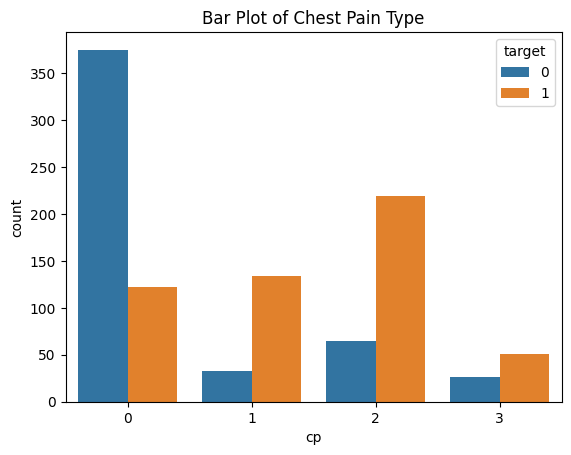

In [7]:
# Bar plot of cp type

sns.countplot(data=x, x='cp', hue='target')
plt.title('Bar Plot of Chest Pain Type')
plt.show()

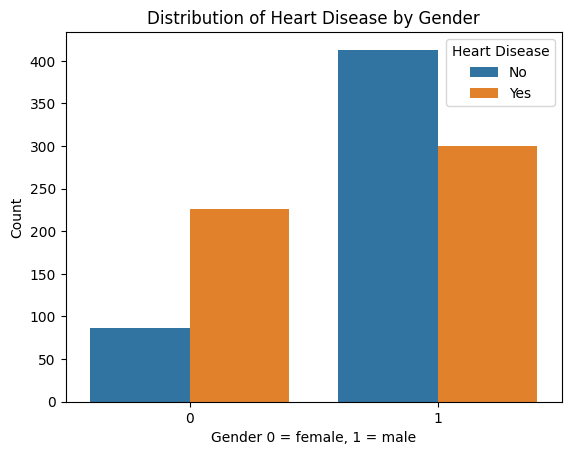

In [8]:
#count of males and females having heart disease

sns.countplot(data=x, x='sex', hue='target')
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Gender 0 = female, 1 = male')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


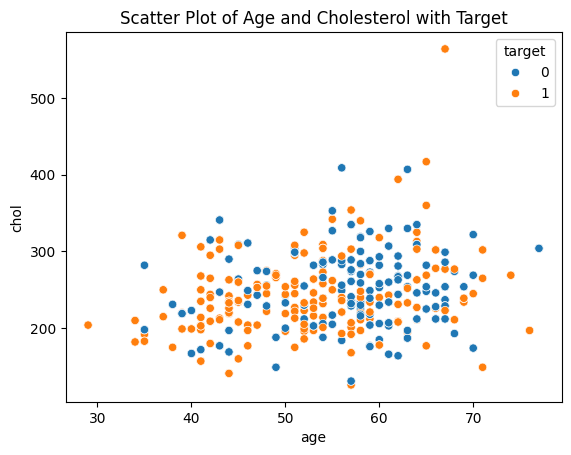

In [9]:
sns.scatterplot(data=x, x='age', y='chol', hue='target')
plt.title('Scatter Plot of Age and Cholesterol with Target')
plt.show()

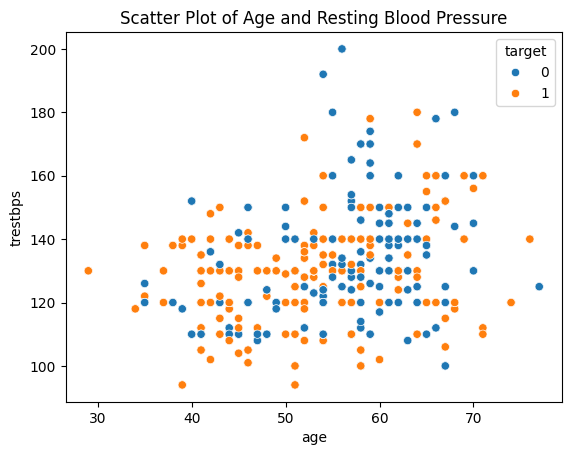

In [11]:
sns.scatterplot(data=x, x='age', y='trestbps', hue='target')
plt.title('Scatter Plot of Age and Resting Blood Pressure')
plt.show()

# Importing Models from sklearn library

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [13]:
#removing target column from data

a_train = x.drop(['target'], axis=1)
b_train = x['target']
x_train, x_test, y_train, y_test = train_test_split(a_train, b_train, test_size=0.2, random_state=42)

# Training Models

In [14]:
model_lr = LogisticRegression(max_iter = 1500)
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=1500)

In [15]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
b_pred = model_lr.predict(x_test)

In [17]:
Brf_pred = model_rf.predict(x_test)

In [18]:
print("LOGISTIC REGRESSSION")
print(classification_report(y_pred=b_pred, y_true=y_test))
print("RANDOM FOREST CLASSIFIER")
print(classification_report(y_pred=Brf_pred, y_true=y_test))

LOGISTIC REGRESSSION
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

RANDOM FOREST CLASSIFIER
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [19]:
print(accuracy_score(y_pred=b_pred, y_true=y_test))

print(accuracy_score(y_pred= Brf_pred, y_true=y_test))

0.7951219512195122
0.9853658536585366


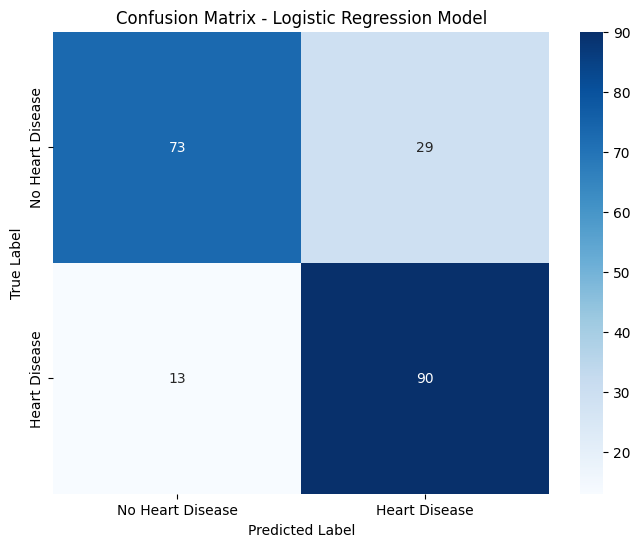

In [20]:
#confusion matrix for Logistic Regression

conf_matrix_lr = confusion_matrix(y_test, b_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

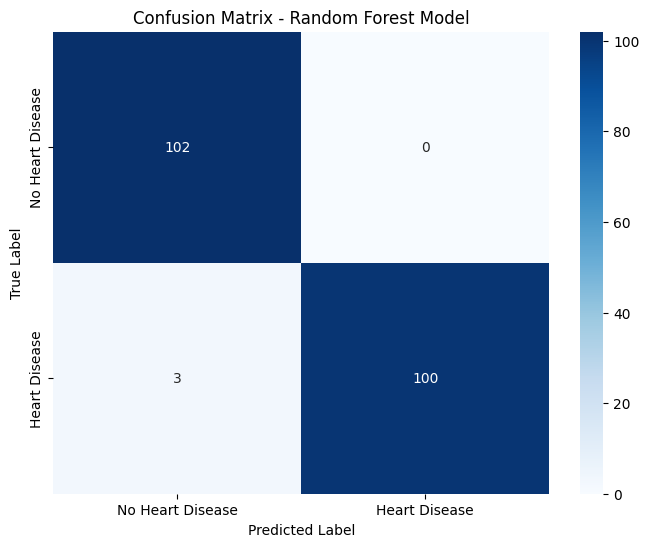

In [21]:
#confusion matrix for random forest

conf_matrix_rf = confusion_matrix(y_test, Brf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

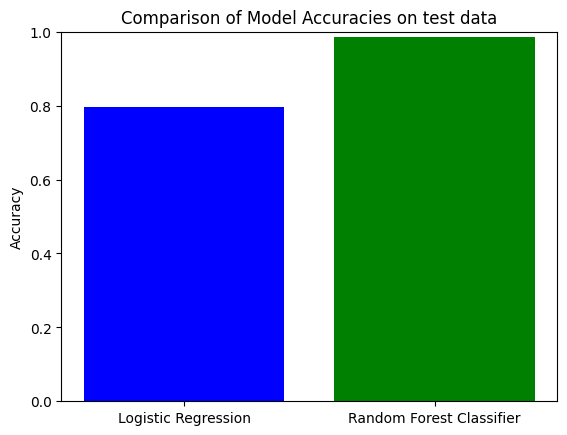

In [22]:
# Predictions from Logistic Regression model
b_pred_lr = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, b_pred_lr)


# Predictions from Random Forest Classifier model
b_pred_rf = model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, b_pred_rf)

# Bar graph
labels = ['Logistic Regression', 'Random Forest Classifier']
accuracies = [accuracy_lr, accuracy_rf]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies on test data')
plt.ylim(0, 1)
plt.show()

# saving random forest model as pkl file

In [23]:
with open('heart_disease.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

# Checking model with random user input

In [24]:
age = int(input("enter age: "))
sex = int(input("enter sex(0 female 1 male): "))
cp = int(input("enter cp (0-3):"))
trestbps = int(input("enter trestbps: "))
chol = int(input("enter chol: "))
fbs = int(input("enter fbs: "))
restecg = int(input("enter restecg: "))
thalach = int(input("enter thalach: "))
exang = int(input("enter exang: "))
oldpeak = float(input("enter oldpeak: "))
slope = int(input("enter slope: "))
ca = int(input("enter ca(0-3): "))
thal = int(input("enter thal: "))

user_input = {
        'age': [age],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [chol],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [thalach],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal]
    }
user_DF = pd.DataFrame(user_input)

enter age: 55
enter sex(0 female 1 male): 1
enter cp (0-3):2
enter trestbps: 5
enter chol: 22
enter fbs: 55
enter restecg: 4
enter thalach: 56
enter exang: 45
enter oldpeak: 45
enter slope: 44
enter ca(0-3): 2
enter thal: 1


In [25]:
def heart_prediction(user_DF):
    pred_user = model_rf.predict(user_DF)
    if pred_user == 0:
        return "No heart disease\nYou're healthy"
    elif pred_user == 1:
        return "Heart disease\nTake precautions"

result = heart_prediction(user_DF)
print(result)


No heart disease
You're healthy
